In [21]:
#Import packages
import pandas as pd 
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [22]:
#Import the file 'C:\\Users\Servet\Desktop\world_bank_projects.json' as a DataFrame
world_bank_projects = pd.read_json('C:\\Users\Servet\Desktop\world_bank_projects.json')

In [23]:
#Find some details about the data frame
print(world_bank_projects.shape)
print('__________________________')
print(world_bank_projects.info)
print('__________________________')
print(world_bank_projects.head())

(500, 50)
__________________________
<bound method DataFrame.info of                                                 sector supplementprojectflg  \
0    [{'Name': 'Primary education'}, {'Name': 'Seco...                    N   
1    [{'Name': 'Public administration- Other social...                    N   
2    [{'Name': 'Rural and Inter-Urban Roads and Hig...                    Y   
3                  [{'Name': 'Other social services'}]                    N   
4    [{'Name': 'General industry and trade sector'}...                    N   
..                                                 ...                  ...   
495  [{'Name': 'General agriculture, fishing and fo...                    N   
496  [{'Name': 'Central government administration'}...                    N   
497  [{'Name': 'Irrigation and drainage'}, {'Name':...                    N   
498  [{'Name': 'Agricultural extension and research...                    N   
499  [{'Name': 'Urban Transport'}, {'Name': 'Public...        

In [24]:
#From the DataFrame: world_bank_projects, we will find the 10 countries with the most projects.
#We will use the column ['countryname'] from the DataFrame and by value_counts() method, we will see the frequencies
#We will use sort_values method to order the frequencies, and by (ascending = False) we will order from greatest to least.
most_frequent_country = world_bank_projects['countryname'].value_counts().sort_values(ascending = False)
print(most_frequent_country[:10])

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Nepal                              12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='pie')` instead of `Series.plot('pie',)`.
  """Entry point for launching an IPython kernel.


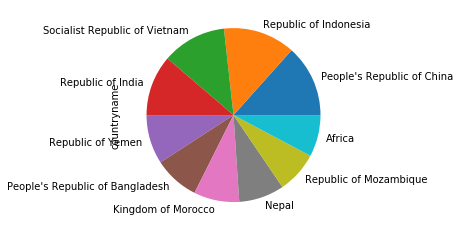

In [60]:
# We will display the 10 most frequent country names in a pie chart
most_frequent_country[:10].plot('pie')

In [12]:
#We will firstly examine the structure of the column: 'mjtheme_namecode'
print(world_bank_projects['mjtheme_namecode'])

0      [{'code': '8', 'name': 'Human development'}, {...
1      [{'code': '1', 'name': 'Economic management'},...
2      [{'code': '5', 'name': 'Trade and integration'...
3      [{'code': '7', 'name': 'Social dev/gender/incl...
4      [{'code': '5', 'name': 'Trade and integration'...
                             ...                        
495    [{'code': '4', 'name': 'Financial and private ...
496    [{'code': '8', 'name': 'Human development'}, {...
497    [{'code': '10', 'name': 'Rural development'}, ...
498    [{'code': '10', 'name': 'Rural development'}, ...
499    [{'code': '9', 'name': 'Urban development'}, {...
Name: mjtheme_namecode, Length: 500, dtype: object


In [19]:
# We will extract the dictionary to columns by normalization method
project_list = json.load(open('C:\\Users\Servet\Desktop\world_bank_projects.json'))
mjtheme_namecode = json_normalize(project_list, 'mjtheme_namecode')

#we will check the head to check the format
print(mjtheme_namecode.head)

<bound method NDFrame.head of      code                                      name
0       8                         Human development
1      11                                          
2       1                       Economic management
3       6     Social protection and risk management
4       5                     Trade and integration
...   ...                                       ...
1494   10                         Rural development
1495    9                         Urban development
1496    8                         Human development
1497    5                     Trade and integration
1498    4  Financial and private sector development

[1499 rows x 2 columns]>


In [20]:
# We will find the 10 most frequent items by value_counts() and sort_values_method
most_frequent_name = mjtheme_namecode['name'].value_counts().sort_values(ascending = False)
print(most_frequent_name[:10])

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64


C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


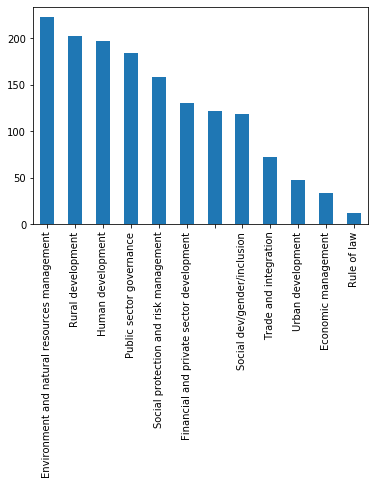

In [53]:
# We will draw a bar blot to visualize the data
mjtheme_namecode['name'].value_counts().plot('bar')
plt.show()

In [32]:
# We will check the datatypes of each column
mjtheme_namecode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null object
name    1499 non-null object
dtypes: object(2)
memory usage: 23.5+ KB


In [34]:
# The code column is object, instead of integer. We will change it to int64 format by pd.to_numeric method
mjtheme_namecode['code'] = pd.to_numeric(mjtheme_namecode['code'])
print(mjtheme_namecode.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null int64
name    1499 non-null object
dtypes: int64(1), object(1)
memory usage: 23.5+ KB
None


In [48]:
# Now, we will replace the empty entries with NaN
mjtheme_with_NaN = mjtheme_namecode.replace('', np.nan)

# We will sort based on the codes
mjtheme_with_NaN = mjtheme_with_NaN.sort_values(['code','name'])
print(mjtheme_with_NaN[:60])

      code                      name
2        1       Economic management
88       1       Economic management
175      1       Economic management
204      1       Economic management
205      1       Economic management
220      1       Economic management
222      1       Economic management
223      1       Economic management
249      1       Economic management
357      1       Economic management
453      1       Economic management
454      1       Economic management
458      1       Economic management
497      1       Economic management
647      1       Economic management
648      1       Economic management
784      1       Economic management
803      1       Economic management
841      1       Economic management
900      1       Economic management
1010     1       Economic management
1045     1       Economic management
1056     1       Economic management
1057     1       Economic management
1078     1       Economic management
1206     1       Economic management
1

In [50]:
# NaN values appear with code:1. We will use ffill method to fill NaN values with the last valid values
mjtheme_with_NaN_filled = mjtheme_with_NaN.fillna(method = 'ffill')

# We will check the first 60 entries
print(mjtheme_with_NaN_filled[:60])

      code                      name
2        1       Economic management
88       1       Economic management
175      1       Economic management
204      1       Economic management
205      1       Economic management
220      1       Economic management
222      1       Economic management
223      1       Economic management
249      1       Economic management
357      1       Economic management
453      1       Economic management
454      1       Economic management
458      1       Economic management
497      1       Economic management
647      1       Economic management
648      1       Economic management
784      1       Economic management
803      1       Economic management
841      1       Economic management
900      1       Economic management
1010     1       Economic management
1045     1       Economic management
1056     1       Economic management
1057     1       Economic management
1078     1       Economic management
1206     1       Economic management
1

In [52]:
# Now we will do the same analysis once again as in Question 2:
most_frequent_name_filled = mjtheme_with_NaN_filled['name'].value_counts().sort_values(ascending = False)
print(most_frequent_name_filled[:10])

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64


C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


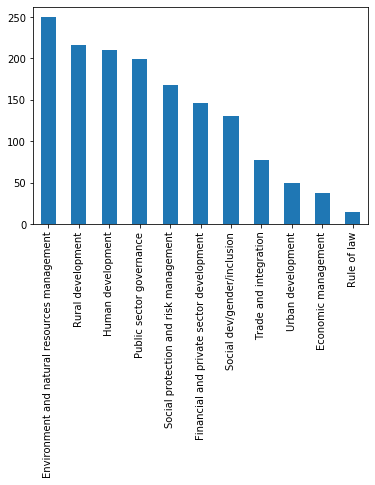

In [54]:
# And we will plot a new bar graph
mjtheme_with_NaN_filled['name'].value_counts().plot('bar')
plt.show()